__Ejercicio 2__. Utiliza tu función `derivadaNumerica` para
calcular la derivada de la función $\cos$ en un punto
$x_0\in[0,1)$. Compara tu resultado con el que indica el
cálculo exacto. Utiliza valores de $h$ cada vez más pequeños, grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos $h$'s cada vez más pequeño. Para ello pueden graficar el resultado de la derivada numérica contra $1/h$.
Observa el resultado de la aproximación y comenta. ¿El error es del orden de $h$?, para ver esto grafica el error relativo a $f'(x_0)$:
$$\epsilon=\left|\frac{\Delta f(x_0,h)/h-f'(x_0)}{f'(x_0)}\right|,$$
respecto a $h$.

In [2]:
function derivadaNumerica(f,x0,h) #función, punto inicial, incremento 
    derivada=(f(x0+h)-f(x0))/h
    return derivada
    end;

La derivada de coseno es el seno entonces tomando como punto 0.6

In [3]:
-sin(0.6)

-0.5646424733950354

Utilizando nuestra función con valores más pequeños, (h) 
Vemos que se aproxima al valor exacto.

In [4]:
function f(x)
    cos(x)
    end;

In [5]:
derivadaNumerica(f,0.6,0.1)

-0.6049342762518983

In [6]:
derivadaNumerica(f,0.6,0.01)

-0.5687597064198857

In [7]:
derivadaNumerica(f,0.6,0.001)

-0.5650550470610582

In [8]:
derivadaNumerica(f,0.6,0.0001)

-0.5646837392347948

Para mostrar como converge al valor exacto graficamos

In [9]:
using PyPlot

In [10]:
function converger(f,x,h)
    lista_derivada = [] #se almacenarás los valores de la derivada
    r = 0.0 
    for i in 1:length(h)
        r = derivadaNumerica(f,x,h[i])
        push!(lista_derivada,r)
    end
    xlabel("1/h")
    ylabel("Derivada de cos(0.6)")
    title("Convergencia al valor ")
    plot(fill(-sin(0.6),length(h)),"ys",label=("-sin(0.6)")) #La asintota del valor exacto
    plot(1/h,lista_derivada,"r")
    legend()
    show()
end

converger (generic function with 1 method)

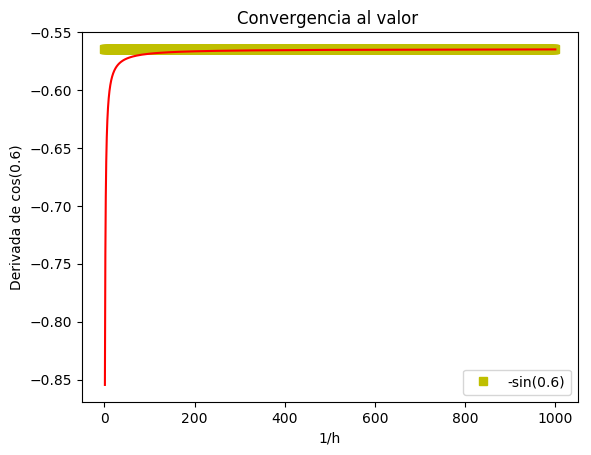

In [11]:
converger(f,0.6,linspace(1,0.001,1000))

Con la gráfica anterior podemos ver que mientras más grande es el valor de $\frac{1}{h}$, la derivada va a tener a nuestro valor dada x=0.6

Ahora graficaremos el error relativo

In [12]:
function E_Relativo(f,x,h,derivada) #derivada es el valor exacto -sin(0.6)
    error=((derivadaNumerica(f,x,h)/derivada)-1)
    return error
    end;

In [13]:
E_Relativo(f,0.6,0.001,-sin(0.6))

0.0007306812460319279

In [14]:
function grafica_ERelativo(f,x,h,derivada)
     #derivada es el valor exacto -sin(0.6)
    lista_r=[] #en esta lista se van a guardar los errores relativos
    error=0.0
    for i in 1:length(h) #depende del número de h, que solicitemos
        error=E_Relativo(f,x,h[i],derivada)
        push!(lista_r,error) 
    end
    xlabel("h"),ylabel("Error relativo"),title("")
    plot(h,lista_r)
    show()
    end;

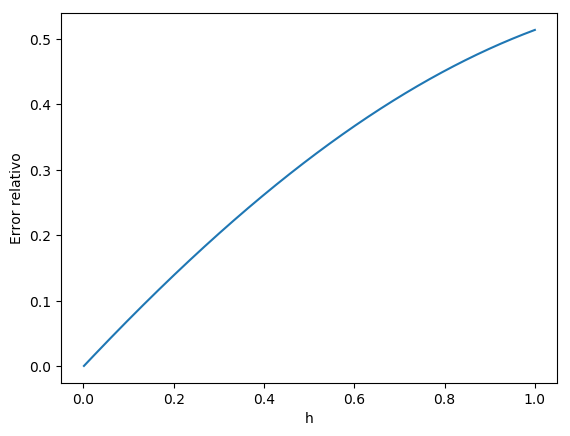

In [15]:
grafica_ERelativo(f,0.6,linspace(1,0.001,1000),sin(-0.6))

__Ejercicio 3__. Teniendo en mente la serie de Taylor para $f(x+h)$ ¿existe
alguna forma de mejorar el cálculo de la derivada numérica? Comenta.

__Tip:__ ¿Que pasa con los términos pares de la serie cuando la calculamos para $f(x-h)$?, ¿Como podemos despejar la derivada exacta de $f$ combinando ambas series? 

__Nota:__ Entregar en $\LaTeX$ en el notebook de la tarea.

Tenemos que la serie de Taylor de $f(x+h)$ alrededor de h=0 es de la siguiente forma

$$f(x+h)=f{\left (x \right )} + h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right)
$$

Y para $f(x-h)$ alrededor de h=0, está dada por:

$$
f(x-h)=f{\left (x \right )} - h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} - \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right)
$$

Si restamos $f(x+h)-f(x-h)$, obtenemos sólo la suma de los términos pares

$$f(x+h)-f(x-h)=2h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }}+ \frac{h^{3}}{3} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }}+ \mathcal{O}\left(h^{5}\right)$$

Si tomamo sólo hasta el término de la derivada:

$$f(x+h)-f(x-h)=2h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }}+ \mathcal{O}\left(h^{3}\right)$$

Sustituyendo  $$\Delta f(x,h)=f(x+h)-f(x-h)$$ y 
$$f'(x)=\left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }}$$ 

Tendremos una nueva expresión:

$$\Delta f(x,h)=2h f'(x)+ \mathcal{O}\left(h^{3}\right)$$

Por último despejamos

$$
\frac{\Delta f(x,h)}{2h}-f'(x)=\mathcal{O}\left(h^{2}\right)
$$

__Ejercicio 4__. Implementa la _derivada
simétrica_ en `Julia` como `derivada_Simetrica` y repite la
comparativa que realizaste en el __ejercicio 2__.

In [16]:
function derivada_Simetrica(f,x,h)
    simetrica=((f(x+h)-f(x-h))/2h) 
    #aplicando la definición de derivada simétrica
    return simetrica
    end;

In [17]:
derivada_Simetrica(f,0.6,0.0001)

-0.5646424724536914

In [18]:
function convergencia_simetrica(f,x,h)
    list_d= [] #se almacenarán los valores de la derivada simetrica
    derivadas= 0.0
    for i in 1:length(h)
        derivadas=derivada_Simetrica(f,x,h[i])
        push!(list_d,derivadas)
       
    end
    xlabel("1/h"),ylabel("Derivada simétrica cos(0.6)"),title("Convergencia")
    plot(fill(derivada_Simetrica(f,0.5,0.00001),length(h)),"rp")
    plot(1/h,list_d,"g")
    show()
    end;

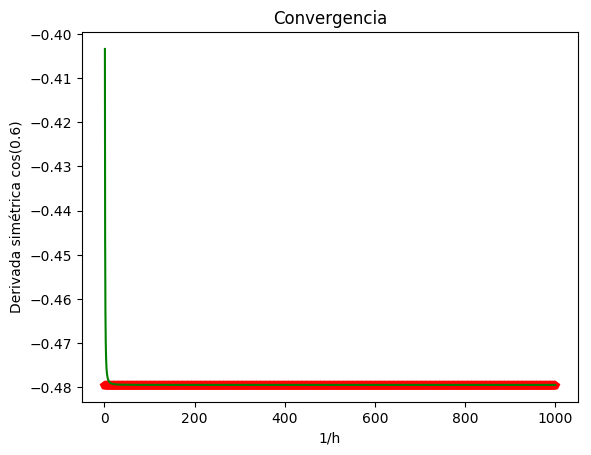

In [19]:
convergencia_simetrica(f,0.5,linspace(1,0.001,1000))

Para el error simétrico 

In [20]:
function Error_simetrico(f,x,h,derivada)
     #derivada es el valor exacto -sin(0.6)
    error=derivada_Simetrica(f,x,h)-derivada
    return error
    end;

In [21]:
Error_simetrico(f,0.6,0.0001,-sin(0.6))

9.413440027472575e-10

In [22]:
function grafica_Esimetrico(f,x,h,derivada)
    #derivada es el valor exacto -sin(0.6)
    lista_error=[]
    errores=0.0
    for i in 1:length(h)
        errores=Error_simetrico(f,x,h[i],derivada)
        push!(lista_error,errores)
    end
    xlabel("h"),ylabel("Error relativo"), title("Error relativo derivada cos(0.6)")
    plot(h,lista_error,"g--")
    show()
    end;

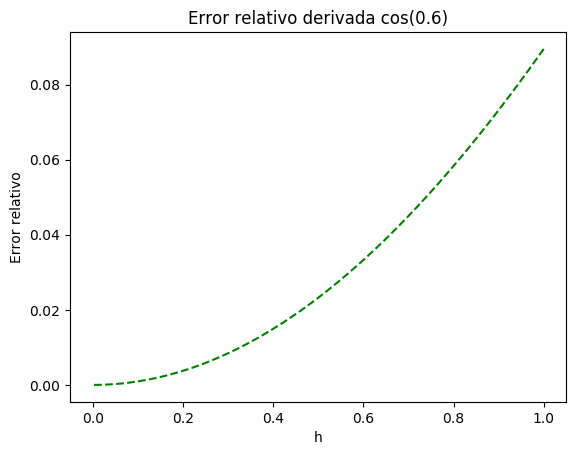

In [23]:
grafica_Esimetrico(f,0.6,linspace(1,0.0001,10000),-sin(0.6))

__Ejercicio 5:__ Demuestre que $\Delta_h$ es un operador lineal y que podemos "factorizar" la función a la derecha del operador. Hecho esto podemos quitar de ambos lados la función $f$ para obtener lo siguiente:
$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$

Si ${ \Delta  }_{ h }$ es un operador lineal, necesita abrir sumas y sacar escalares

Sea $\beta $ un escalar y $f(x)$ y $g(x)$ dos funciones. 
$${ \Delta  }_{ h }(\beta f(x)+g(x))=\sum _{ n=1 }^{ \infty  }{ \frac { h^{ n } }{ n! }  } \frac { { d }^{ n }(\beta f(x)+g(x)) }{ d{ x }^{ n } } $$

Sabemos que la derivada es un operador lineal, entonces:

$${ \Delta  }_{ h }(\beta f(x)+g(x))=\sum _{ n=1 }^{ \infty  }{ \frac { h^{ n } }{ n! }  } \left( \beta \frac { { d }^{ n }f(x) }{ d{ x }^{ n } } +\frac { { d }^{ n }g(x) }{ d{ x }^{ n } }  \right)  $$

distribuyendo ya que la suma también es un operador tenemos que

$${ \Delta  }_{ h }(\beta f(x)+g(x))=\beta \sum _{ n=1 }^{ \infty  }{ \left( \frac { h^{ n } }{ n! } \frac { { d }^{ n }f(x) }{ d{ x }^{ n } }  \right) +\sum _{ n=1 }^{ \infty  }{ \left( \frac { h^{ n } }{ n! } \frac { { d }^{ n }g(x) }{ d{ x }^{ n } }  \right)  }  } $$

Por lo que finalmente llegamos a:

$${ \Delta  }_{ h }(\beta f+g)=\beta { \Delta  }_{ h }(f)+{ \Delta  }_{ h }(g)$$

__Ejercicio 6:__ Para saber como se relaciona el _operador derivada exacta_ con el _operador diferencia finita hacia adelante_ es necesario invertir la serie $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$. Una forma directa de hacerlo es identificar la función para la cual es esa serie. Entonces, pensando en el operador derivada como un número, la serie se identifica como función evaluada en $\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$, ¿cual es esa función?. Si llamamos $\phi$ a dicha función, deberiamos de tener una relación de la siguiente forma:
$$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$.
    
* __Nota:__ En la clase se demostró que $\phi(x)=e^x-1$, escriba el razonamiento en $\LaTeX$ de como se llegó a esto.

Usando que

$${ \Delta  }_{ h }f(x)=f(x+h)-f(x)$$

Si se aplica la serie de Taylor obtenemos 

$$f(x+h)-f(x)=h{ f }'(x)+\frac { { h }^{ 2 } }{ 2 } { f }''(x)+\frac { { h }^{ 3 } }{ 6 } { f }'''(x)+...$$

Factorizando $f(x)$

$${ \Delta  }_{ h }f(x)=\left( h\frac { d }{ dx } +\frac { { h }^{ 2 } }{ 2 } \frac { { d }^{ 2 } }{ { dx }^{ 2 } } +\frac { { h }^{ 3 } }{ 6 } \frac { { d }^{ 3 } }{ { dx }^{ 3 } } +... \right) f(x)$$

Dividiendo entre $f(x)$

$${ \Delta  }_{ h }=\left( h\frac { d }{ dx } +\frac { { h }^{ 2 } }{ 2 } \frac { { d }^{ 2 } }{ { dx }^{ 2 } } +\frac { { h }^{ 3 } }{ 6 } \frac { { d }^{ 3 } }{ { dx }^{ 3 } } +... \right) =\sum _{ i=0 }^{ \infty  }{ \frac { { \left( h\frac { d }{ dx }  \right)  }^{ i } }{ i! } -1 }  $$

Utilizando que la serie de Taylor para la exponencia está expresada de la siguiente forma:

$${ e }^{ y }=\sum _{ i=1 }^{ \infty  }{ \frac { { y }^{ i } }{ i! }  } =\sum _{ i=0 }^{ \infty  }{ \frac { { y }^{ i } }{ i! } -1 } $$

Por lo que:

$${ \Delta  }_{ h }={ e }^{ h\frac { d }{ dx }  }-1$$

como $\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$, obtenemos:

$$\phi(x)=e^x-1$$


